<a href="https://www.linkedin.com/in/hern%C3%A1n-contigiani-41260679/"><img src="https://raw.githubusercontent.com/hernancontigiani/tf_certification/main/images/hc_banner.png" width="1000" align="center"></a>


# Tensorflow Developer Certification

Regression practice

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split

In [ ]:
!wget https://raw.githubusercontent.com/hernancontigiani/tf_certification/main/utils_tf.py
from utils_tf import *

--2021-12-21 22:40:56--  https://raw.githubusercontent.com/hernancontigiani/tf_certification/main/utils_tf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10065 (9.8K) [text/plain]
Saving to: ‘utils_tf.py’

utils_tf.py         100%[===================>]   9.83K  --.-KB/s    in 0s      

2021-12-21 22:40:56 (116 MB/s) - ‘utils_tf.py’ saved [10065/10065]



In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
in_shape = X_train.shape[1]
in_shape

11

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=(in_shape,)),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss="mae",
                optimizer="adam",
                metrics=['mae'])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
history1 = model_1.fit(X_train, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
27/27 [==============================] - 0s 7ms/step - loss: 13513.9414 - mae: 13513.9414 - val_loss: 12650.0947 - val_mae: 12650.0947
Epoch 2/100
27/27 [==============================] - 0s 2ms/step - loss: 13512.2979 - mae: 13512.2979 - val_loss: 12648.3906 - val_mae: 12648.3906
Epoch 3/100
27/27 [==============================] - 0s 2ms/step - loss: 13510.4824 - mae: 13510.4824 - val_loss: 12646.5049 - val_mae: 12646.5049
Epoch 4/100
27/27 [==============================] - 0s 2ms/step - loss: 13508.4756 - mae: 13508.4756 - val_loss: 12644.4277 - val_mae: 12644.4277
Epoch 5/100
27/27 [==============================] - 0s 2ms/step - loss: 13506.2617 - mae: 13506.2617 - val_loss: 12642.1484 - val_mae: 12642.1484
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 13503.8408 - mae: 13503.8408 - val_loss: 12639.6494 - val_mae: 12639.6494
Epoch 7/100
27/27 [==============================] - 0s 2ms/step - loss: 13501.2021 - mae: 13501.2021 - val_loss: 1263

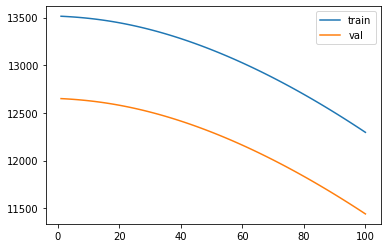

In [ ]:
history_plot(history1, metric="mae")

In [ ]:
model_1_mae = model_1.evaluate(X_test, y_test)[1]
model_1_mae

9/9 [==============================] - 0s 1ms/step - loss: 11743.9629 - mae: 11743.9629


11743.962890625

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
model_2.compile(loss="mae",
                optimizer="adam",
                metrics=['mae'])

In [ ]:
history2 = model_2.fit(X_train, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
27/27 [==============================] - 1s 7ms/step - loss: 13457.4385 - mae: 13457.4385 - val_loss: 12545.8076 - val_mae: 12545.8076
Epoch 2/100
27/27 [==============================] - 0s 2ms/step - loss: 13342.8105 - mae: 13342.8105 - val_loss: 12397.4160 - val_mae: 12397.4160
Epoch 3/100
27/27 [==============================] - 0s 2ms/step - loss: 13138.2080 - mae: 13138.2080 - val_loss: 12124.3320 - val_mae: 12124.3320
Epoch 4/100
27/27 [==============================] - 0s 2ms/step - loss: 12770.5557 - mae: 12770.5557 - val_loss: 11650.5312 - val_mae: 11650.5312
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 12159.9092 - mae: 12159.9092 - val_loss: 10899.1924 - val_mae: 10899.1924
Epoch 6/100
27/27 [==============================] - 0s 2ms/step - loss: 11250.9658 - mae: 11250.9658 - val_loss: 9863.8232 - val_mae: 9863.8232
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 10119.6953 - mae: 10119.6953 - val_loss: 8772.9

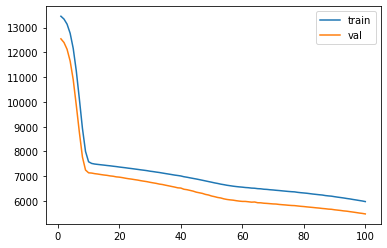

In [ ]:
history_plot(history2, metric="mae")

In [ ]:
model_2_mae = model_2.evaluate(X_test, y_test)[1]
model_2_mae

9/9 [==============================] - 0s 3ms/step - loss: 5733.0781 - mae: 5733.0781


5733.078125